### **Classification Model Development for Astronomical Objects Using SDSS Data**


#### Brief Project Description
The project aims to conduct an in-depth feature importance analysis to determine which attributes are most influential in classifying astronomical objects—specifically stars, galaxies, and quasars—using the Sloan Digital Sky Survey (SDSS) DR17 dataset. Following this analysis, we will develop and evaluate machine learning models to classify these objects based on the most critical features identified. This project integrates data preprocessing, exploratory data analysis (EDA), feature importance evaluation, model development, and performance evaluation, culminating in a robust, interpretable classification model and comprehensive visualizations.


### Detailed Introduction to Stellar Classification

Stellar classification is a fundamental aspect of astronomy, focusing on categorizing celestial objects based on their spectral characteristics. This process helps astronomers understand the nature, evolution, and properties of stars, galaxies, and quasars. The Sloan Digital Sky Survey (SDSS) has significantly contributed to this field by providing extensive spectral data on a vast number of celestial objects.

#### Importance of Classifying Astronomical Objects
Classifying astronomical objects is critical for several reasons:
1. **Understanding Cosmic Evolution**: By classifying stars, galaxies, and quasars, astronomers can infer the life cycles of these objects and understand the processes of formation, evolution, and demise within the universe.
2. **Galaxy Formation and Evolution**: Classifying stars, galaxies, and quasars helps in understanding the formation and evolution of galaxies, which are the building blocks of the universe.
3. **Chemical Composition**: Spectral classification reveals the chemical composition of celestial objects, shedding light on the processes of nucleosynthesis and the enrichment of the interstellar medium.
4. **Distance Measurement**: Classifying different types of celestial objects, including those with known intrinsic luminosities, aids in measuring astronomical distances, which is crucial for mapping the scale of the universe.

#### The Role of Spectroscopy
Spectroscopy is the primary tool for classifying astronomical objects. It involves analyzing the light emitted or absorbed by objects to determine their properties. Each object, whether a star, galaxy, or quasar, emits light at specific wavelengths, producing a unique spectrum. By examining these spectra, astronomers can classify objects based on their temperature, chemical composition, and other physical properties.

In the SDSS, spectroscopy has been used extensively to gather data on millions of celestial objects. The SDSS spectrograph captures light across multiple wavelengths, from ultraviolet to infrared, providing a detailed spectrum for each object observed. This spectral data is crucial for accurate classification.

#### The SDSS DR17 Dataset
The SDSS DR17 dataset is one of the most comprehensive astronomical datasets available, containing observations of approximately 100,000 objects, including stars, galaxies, and quasars. Each observation is described by 17 feature columns and a class column identifying the type of object.
- **obj_ID**: Unique identifier for each astronomical object in the image catalog.
- **alpha**: Right Ascension angle, specifying the object's position in the sky (longitude-like coordinate).
- **delta**: Declination angle, specifying the object's position in the sky (latitude-like coordinate).
- **u**: Magnitude measurement in the ultraviolet filter of the photometric system.
- **g**: Magnitude measurement in the green filter of the photometric system.
- **r**: Magnitude measurement in the red filter of the photometric system.
- **i**: Magnitude measurement in the near-infrared filter of the photometric system.
- **z**: Magnitude measurement in the infrared filter of the photometric system.
- **run_ID**: Identifier for the specific scan or observation run.
- **rerun_ID**: Identifier for the specific processing run of the image data.
- **cam_col**: Column number of the camera used to capture the image.
- **field_ID**: Identifier for the specific field of view in the sky.
- **spec_obj_ID**: Unique identifier for optical spectroscopic objects, indicating shared classification across observations.
- **class**: Classification of the object as a star, galaxy, or quasar.
- **redshift**: Measure of the object's redshift, indicating the degree of wavelength increase due to the universe's expansion.
- **plate**: Identifier for the plate used in the SDSS spectroscopic observation.
- **MJD**: Modified Julian Date, indicating when the observation was taken.
- **fiber_ID**: Identifier for the fiber optic cable used to collect light for spectroscopic analysis.

#### Methodology
The project will begin with data preprocessing to clean and prepare the dataset for analysis. Exploratory Data Analysis (EDA) will then be conducted to visualize and understand the distribution and relationships of the features. Feature importance analysis will follow, using techniques such as Random Forest Feature Importances, SHAP (SHapley Additive exPlanations), or LIME (Local Interpretable Model-agnostic Explanations). These methods will help identify which features most significantly impact the classification of astronomical objects.

Subsequently, the project will focus on developing and comparing three machine learning models, including Decision Tree, Random Forest and XGBoost. The models will be trained and tested using the most important features identified. Performance will be evaluated using metrics like accuracy, precision, recall, and F1-score. Hyperparameter tuning will optimize the best-performing model, and advanced interpretability techniques will ensure the model's decisions are understandable.


# Data Preprocessing


In [ ]:
#import libraries and mount drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data_path = '/content/drive/My Drive/star_classification.csv'
dataset = pd.read_csv(data_path)

In [ ]:
dataset.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


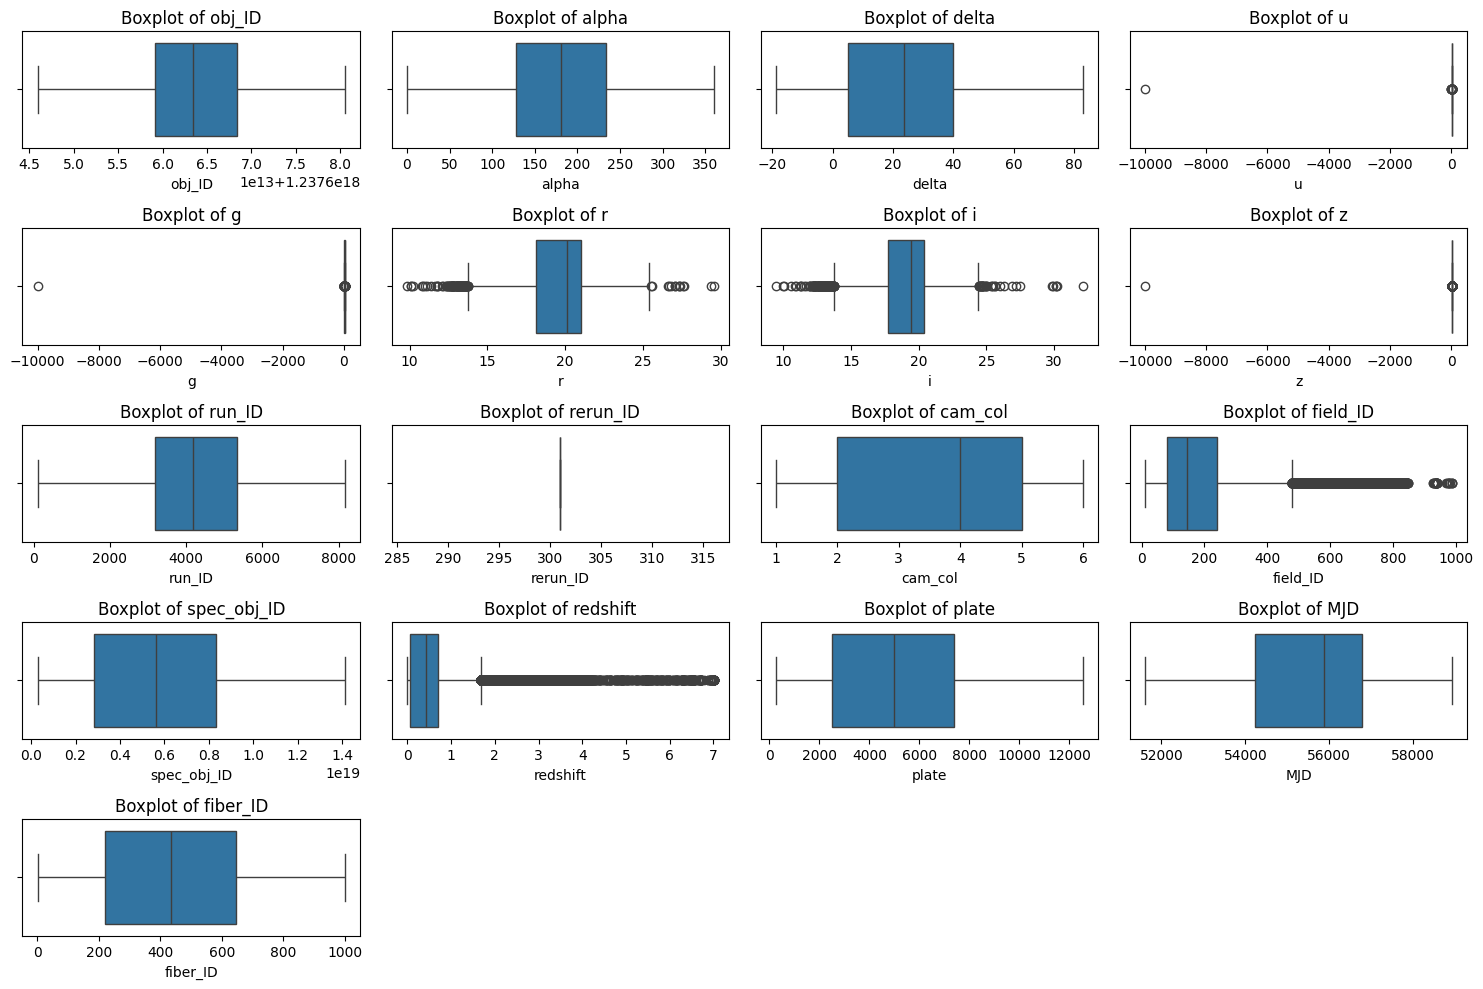

In [ ]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=dataset, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    for column in columns:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
dataset_cleaned = remove_outliers(dataset, numeric_columns)


Original dataset shape: (100000, 18)
Dataset shape after removing outliers: (85595, 18)


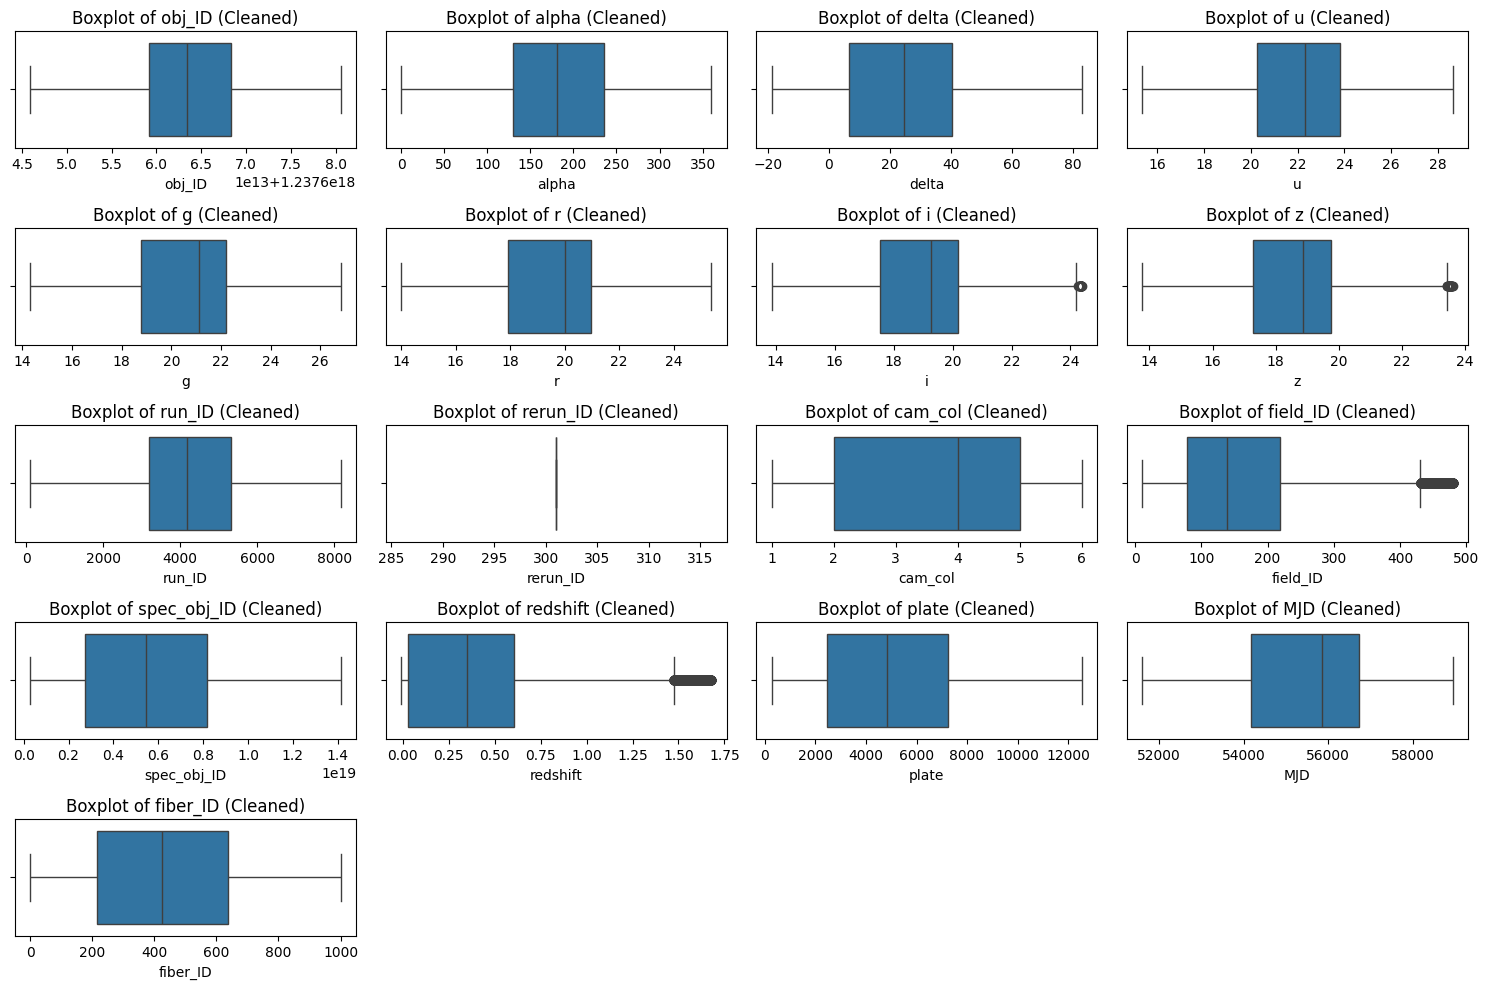

In [ ]:
print(f"Original dataset shape: {dataset.shape}")
print(f"Dataset shape after removing outliers: {dataset_cleaned.shape}")
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=dataset_cleaned, x=column)
    plt.title(f'Boxplot of {column} (Cleaned)')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis




In [ ]:
# Converting 'class' column to numerical values
class_mapping = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
dataset_cleaned['class'] = dataset_cleaned['class'].map(class_mapping)


In [ ]:
dataset_cleaned = dataset_cleaned.drop(["obj_ID", "rerun_ID"], axis=1)

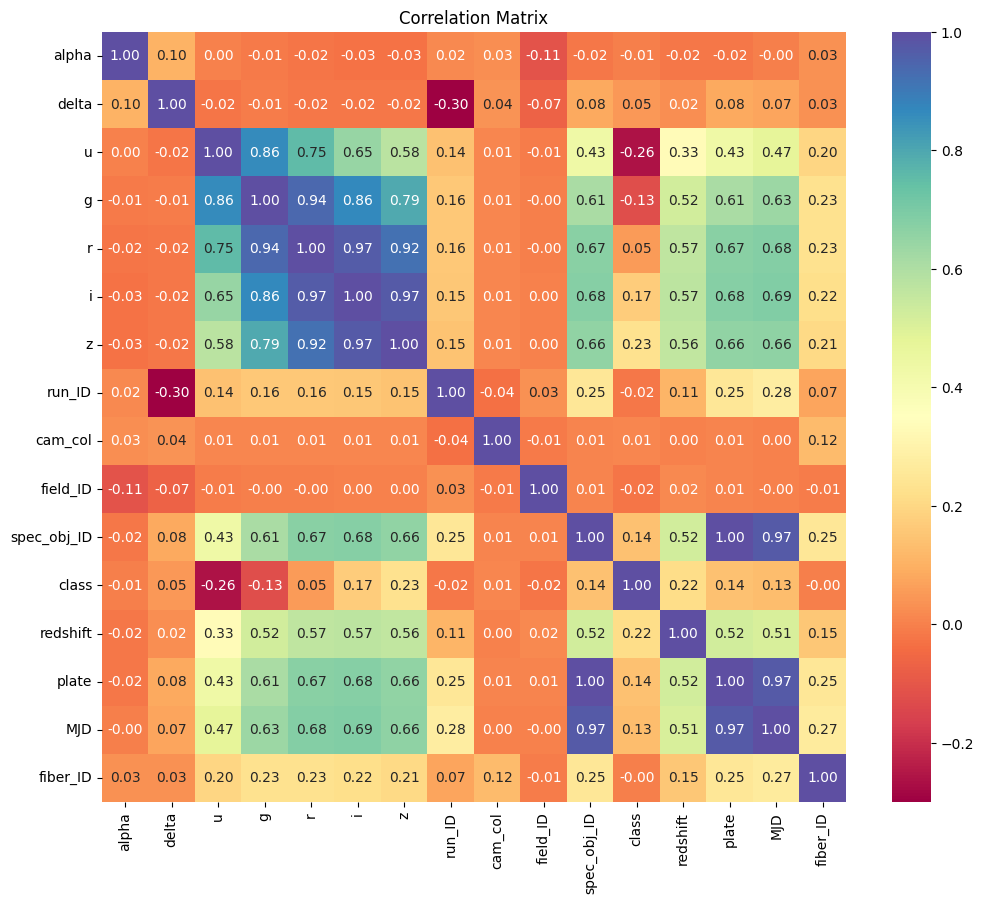

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = dataset_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


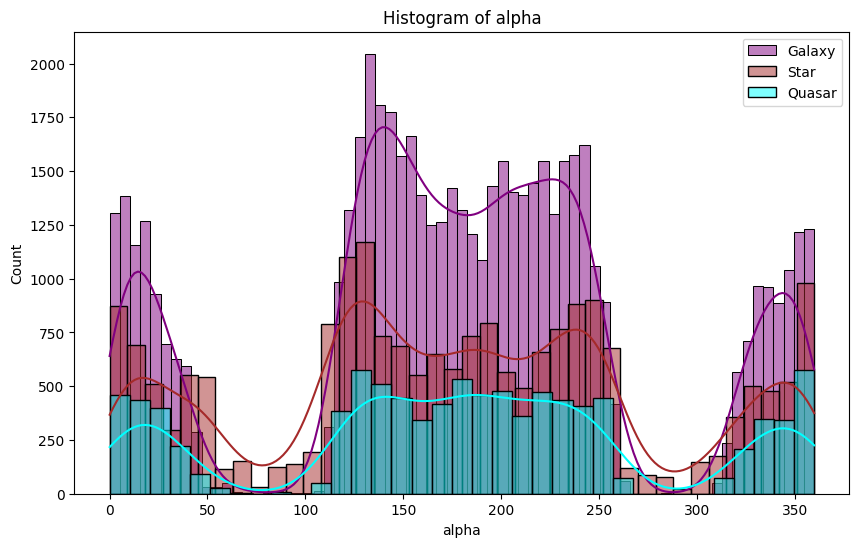

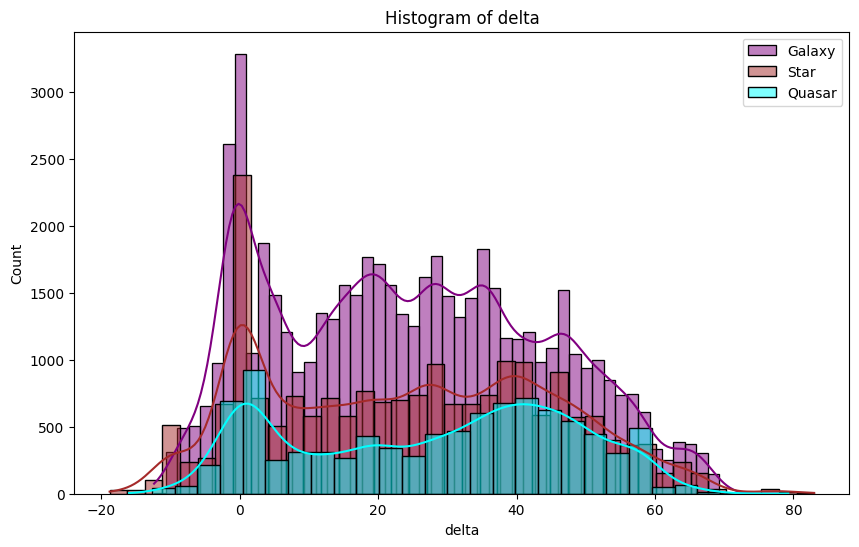

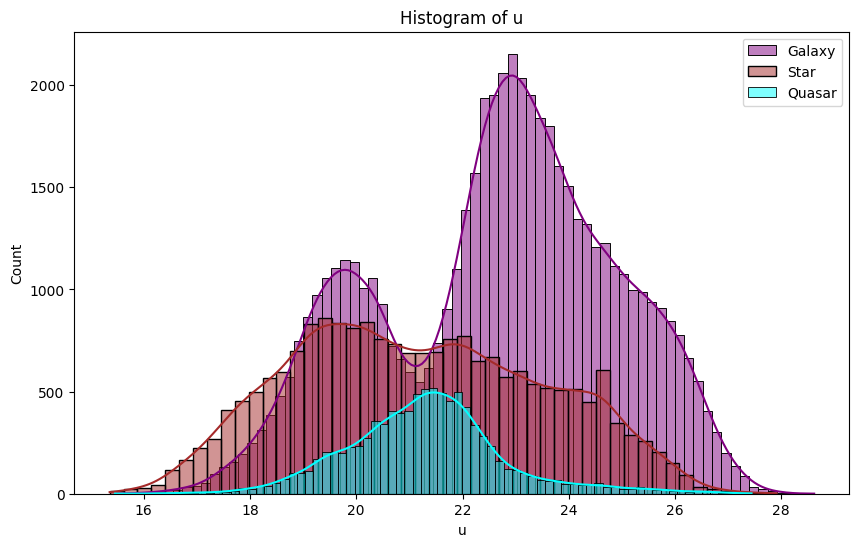

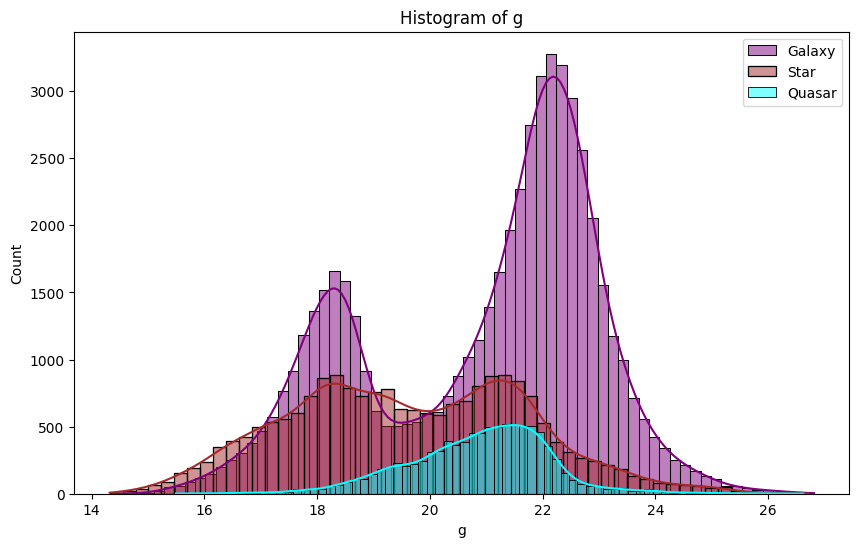

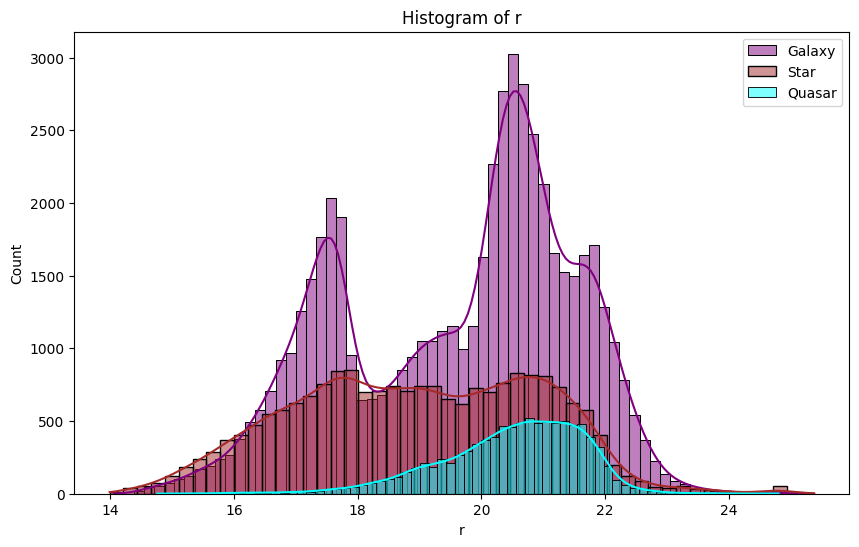

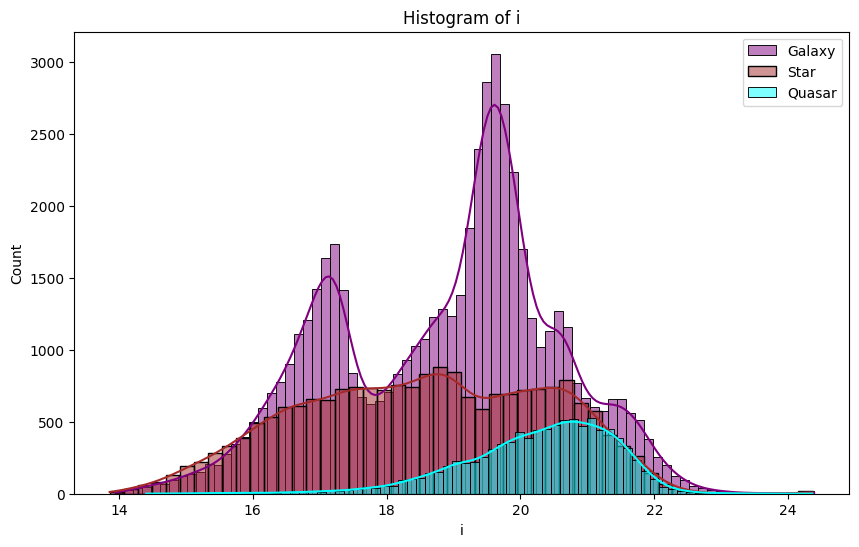

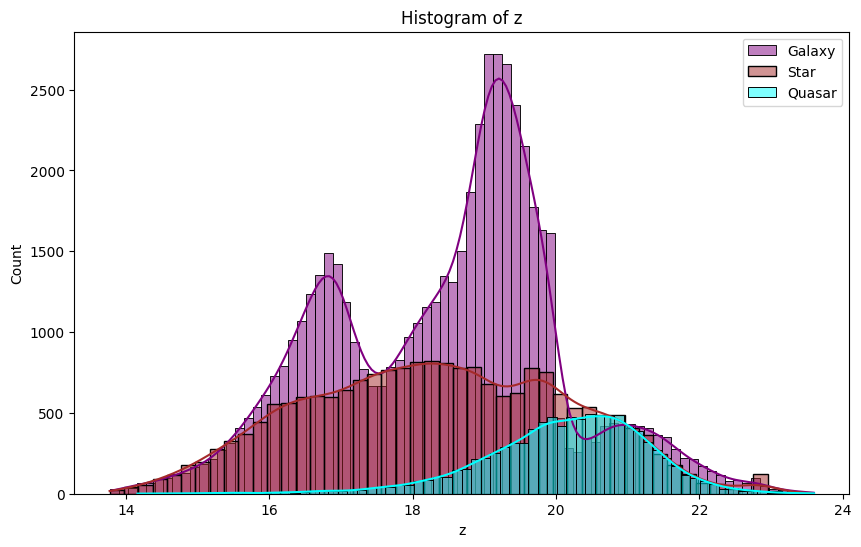

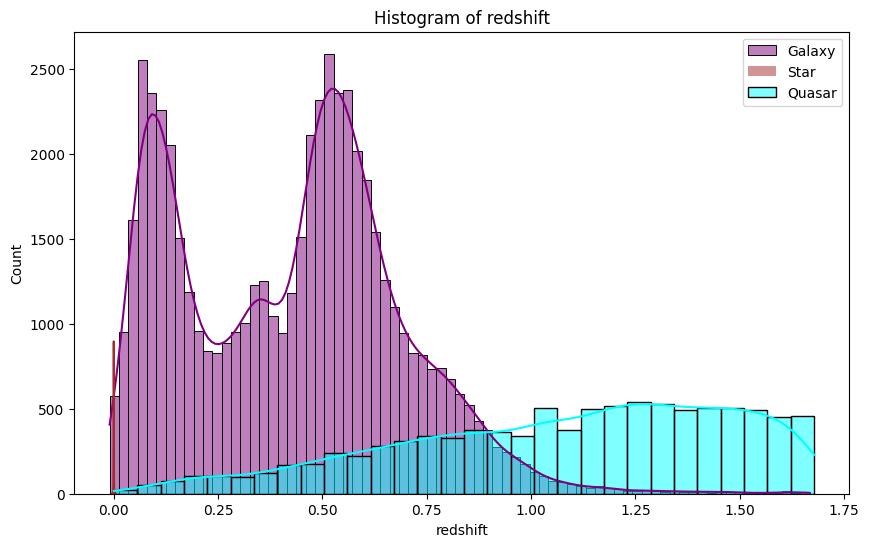

In [ ]:
# Mapping of class numbers to names
class_labels = {0: 'Galaxy', 1: 'Star', 2: 'Quasar'}

def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    colors = ['purple', 'brown', 'cyan']
    for i in range(3):
        sns.histplot(dataset_cleaned[dataset_cleaned['class'] == i][column], kde=True, label=class_labels[i], color=colors[i])
    plt.title(f"Histogram of {column}")
    plt.legend()
    plt.show()

# Columns to Visualize
columns_to_plot = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]

# Plotting histograms
for column in columns_to_plot:
    plot_histogram(column)

### EDA Report Report

#### Correlation Overview
Correlation values range from -1 to 1, where values close to 1 indicate strong positive correlation, values close to -1 indicate strong negative correlation, and values close to 0 indicate little to no correlation.

#### Key Findings

1. **Photometric Filters Correlation**
   - The **u**, **g**, **r**, **i**, and **z** filters show very high positive correlations with each other:
     - **u** and **g**: 0.859
     - **g** and **r**: 0.943
     - **r** and **i**: 0.968
     - **i** and **z**: 0.973
   - This strong correlation is expected as these filters capture light across different but closely related wavelengths, indicating that brighter objects in one filter tend to be brighter in others as well.

2. **Redshift Correlation**
   - The **redshift** feature has a moderate correlation with the photometric filters:
     - **redshift** and **u**: 0.331
     - **redshift** and **g**: 0.523
     - **redshift** and **r**: 0.567
     - **redshift** and **i**: 0.573
     - **redshift** and **z**: 0.560
   - These correlations suggest that objects with higher redshifts (indicating they are farther away) tend to have specific photometric characteristics.

3. **Class Correlation**
   - The **class** feature, representing different types of celestial objects (Galaxy, Star, Quasar), shows various degrees of correlation with other features:
     - **class** and **u**: -0.263
     - **class** and **g**: -0.127
     - **class** and **r**: 0.052
     - **class** and **i**: 0.170
     - **class** and **z**: 0.230
   - This indicates that different classes of objects have distinct photometric properties, which is crucial for classification tasks.

### Histogram Summary
The feature statistics provide insightful distinctions among the three astronomical classes: Galaxy, Star, and Quasar. The most noteworthy differences are observed in the redshift values, where galaxies exhibit a mean redshift of 0.4250, stars show a negligible mean redshift of approximately -0.0001, and quasars have a significantly higher mean redshift of 1.0794. This aligns with the understanding that quasars are typically more distant objects compared to galaxies and stars.

In terms of spatial coordinates, the right ascension (alpha) and declination (delta) values are broadly similar across the classes, although slight variations exist. For example, quasars have a marginally higher mean declination (27.9803) compared to galaxies (24.3403) and stars (24.2520).

Photometric features (u, g, r, i, z) reveal that stars generally have lower mean values, indicating they are often brighter in the optical and near-infrared bands. Quasars show higher mean values in these bands, reflecting their distinct spectral characteristics.


# Feature Importance Analysis


## Introduction to Feature Importance Methods
Feature importance analysis is a crucial step in machine learning projects, especially when dealing with complex datasets. It helps to identify which features (or variables) have the most significant impact on the predictions made by a model. Understanding feature importance not only aids in building more accurate models but also provides insights into the underlying data.

### Random Forest Feature Importances
Random Forest is an ensemble learning method that constructs multiple decision trees during training and combines their outputs to improve predictive accuracy and control overfitting. Random Forests can be used to rank the importance of features in a dataset.

1. Tree Construction: During training, the Random Forest algorithm builds several decision trees using different subsets of the data and features.
2. Gini Importance (or Mean Decrease Impurity): Each time a feature is used to split a node in a tree, the algorithm calculates how much the split reduces the impurity (e.g., Gini impurity) in the tree. The feature’s importance is then averaged across all trees in the forest.
3. Feature Ranking: Features that reduce impurity the most across many trees are considered more important.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_cleaned.drop(columns=['class'])  # Assuming 'target_variable' is the name of your target column
y = dataset_cleaned['class']
# Train the model using a subset of data for faster computation
rf_model_small = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_small.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = rf_model_small.feature_importances_

# Convert to logarithmic scale
log_importances = np.log1p(importances)  # Using log1p for numerical stability

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame(list(zip(X.columns, log_importances)), columns=['Feature', 'Log Importance'])

# Sort the feature importances by descending order
feature_importance = feature_importance.sort_values(by='Log Importance', ascending=False)

# Print feature importances
print(feature_importance)



        Feature  Log Importance
11     redshift        0.458741
2             u        0.068602
6             z        0.065757
3             g        0.057536
5             i        0.038234
10  spec_obj_ID        0.036179
12        plate        0.034419
4             r        0.034233
13          MJD        0.022237
0         alpha        0.012469
1         delta        0.012381
7        run_ID        0.009682
14     fiber_ID        0.007279
9      field_ID        0.006484
8       cam_col        0.003023


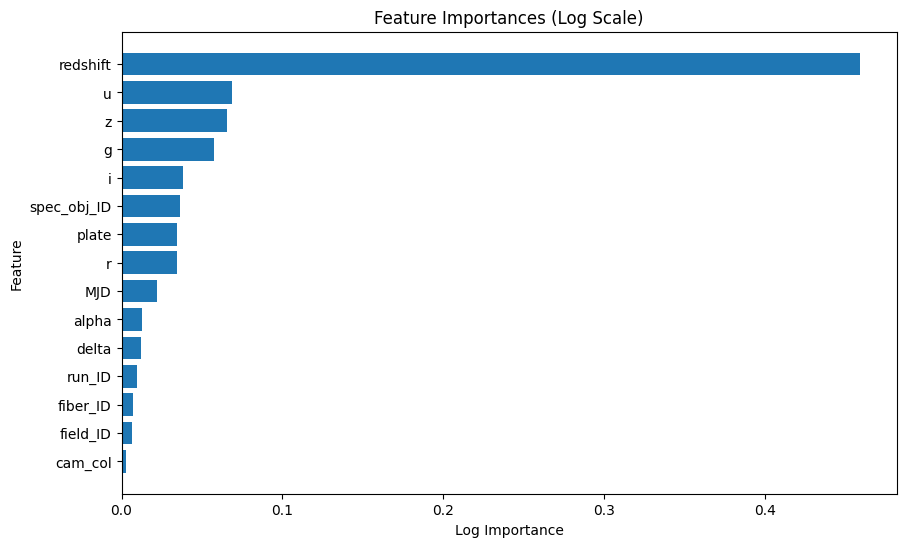

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Log Importance'])
plt.xlabel('Log Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Log Scale)')
plt.gca().invert_yaxis()
plt.show()

### Feature Importance Analysis Report

#### Result

A RandomForestClassifier was trained on the entire dataset, and the importance of each feature was calculated. The feature importance values were then log-transformed using the natural logarithm (log1p) for better numerical stability and interpretability. The following table presents the log-transformed importance values for each feature:

| Feature      | Log Importance |
|--------------|----------------|
| redshift     | 0.458741       |
| u            | 0.068602       |
| z            | 0.065757       |
| g            | 0.057536       |
| i            | 0.038234       |
| spec_obj_ID  | 0.036179       |
| plate        | 0.034419       |
| r            | 0.034233       |
| MJD          | 0.022237       |
| alpha        | 0.012469       |
| delta        | 0.012381       |
| run_ID       | 0.009682       |
| fiber_ID     | 0.007279       |
| field_ID     | 0.006484       |
| cam_col      | 0.003023       |

#### Analysis

Conclusion
The feature importance analysis highlights **redshift** as the most critical feature, reflecting its fundamental role in astrophysics for measuring distances and velocities of celestial objects. Other significant features (**u**, **z**, **g**, and **i** bands) provide valuable information about the stellar populations and star formation activities in galaxies. The remaining features, although less important, contribute to the observational context and the identification of objects. This analysis underscores the importance of specific physical properties and their measurements in understanding the universe's structure and evolution.

# Model Development

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 68476
Testing set size: 17119


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9620889070623284
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11073
           1       1.00      0.99      1.00      4113
           2       0.85      0.83      0.84      1933

    accuracy                           0.96     17119
   macro avg       0.94      0.93      0.94     17119
weighted avg       0.96      0.96      0.96     17119



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9754658566505053
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11073
           1       0.99      1.00      0.99      4113
           2       0.94      0.86      0.90      1933

    accuracy                           0.98     17119
   macro avg       0.97      0.95      0.96     17119
weighted avg       0.98      0.98      0.98     17119



In [ ]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9748232957532567
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11073
           1       0.99      0.99      0.99      4113
           2       0.93      0.87      0.90      1933

    accuracy                           0.97     17119
   macro avg       0.97      0.95      0.96     17119
weighted avg       0.97      0.97      0.97     17119



#Model Evaluation
To properly evaluate the performance of your models, we'll consider several metrics:

1. Accuracy: The proportion of correctly classified instances.
2. Precision: The proportion of true positive results among all positive predictions.
3. Recall (Sensitivity): The proportion of true positive results among all actual positives.
4. F1-score: The harmonic mean of precision and recall, providing a single metric that balances both.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Collect the evaluation metrics
metrics = {
    "Model": ["Random Forest", "XGBoost", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision (macro avg)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['precision']
    ],
    "Recall (macro avg)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['recall']
    ],
    "F1-score (macro avg)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['f1-score']
    ]
}


           Model  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0  Random Forest  0.975466               0.968523            0.949870   
1        XGBoost  0.974823               0.967120            0.949445   
2  Decision Tree  0.962089               0.938322            0.932451   

   F1-score (macro avg)  
0              0.958615  
1              0.957877  
2              0.935347  


<Figure size 1200x600 with 0 Axes>

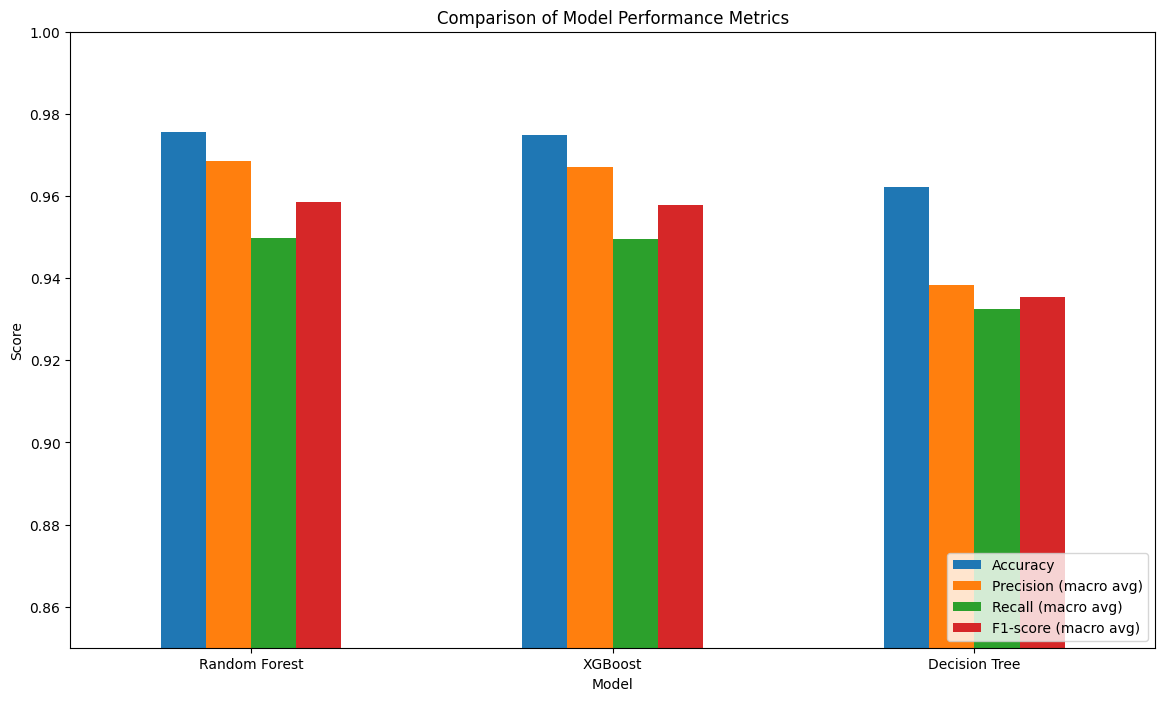

In [ ]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot the metrics with custom y-axis range
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8))

plt.ylim([0.85, 1.0])  # Setting the y-axis range to better visualize small differences
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(loc='lower right')
plt.show()



### Model Performance Evaluation

#### 1. Introduction

This report presents the performance evaluation of three different classification models: Random Forest, XGBoost, and Decision Tree. These models were trained and tested on the dataset to classify celestial objects into three categories based on their features. The primary evaluation metrics used are Accuracy, Precision (macro average), Recall (macro average), and F1-score (macro average).

#### 2. Evaluation Metrics

- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision (macro average)**: The average precision across all classes, treating each class equally.
- **Recall (macro average)**: The average recall across all classes, treating each class equally.
- **F1-score (macro average)**: The harmonic mean of precision and recall, providing a balance between the two metrics.

#### 3. Model Performance

The performance of each model is summarized in the table below:

| Model           | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-score (macro avg) |
|------------------|----------|-----------------------|---------------------|----------------------|
| Random Forest    | 0.975466 | 0.968523              | 0.949870            | 0.958615             |
| XGBoost          | 0.974823 | 0.967120              | 0.949445            | 0.957877             |
| Decision Tree    | 0.962089 | 0.938322              | 0.932451            | 0.935347             |

#### 4. Detailed Analysis

- **Random Forest**:
  - **Accuracy**: 0.975466
  - **Precision (macro avg)**: 0.968523
  - **Recall (macro avg)**: 0.949870
  - **F1-score (macro avg)**: 0.958615
  - The Random Forest model achieved the highest accuracy, precision, recall, and F1-score among the three models. This indicates that the model is highly effective in correctly classifying the celestial objects while maintaining a balance between precision and recall.

- **XGBoost**:
  - **Accuracy**: 0.974823
  - **Precision (macro avg)**: 0.967120
  - **Recall (macro avg)**: 0.949445
  - **F1-score (macro avg)**: 0.957877
  - The XGBoost model performed very similarly to the Random Forest model, with only slight differences in the evaluation metrics. This suggests that XGBoost is also a robust model for this classification task.

- **Decision Tree**:
  - **Accuracy**: 0.962089
  - **Precision (macro avg)**: 0.938322
  - **Recall (macro avg)**: 0.932451
  - **F1-score (macro avg)**: 0.935347
  - The Decision Tree model had the lowest performance metrics among the three models. While it still performed well, it was less effective than Random Forest and XGBoost in accurately classifying the celestial objects.

#### 5. Conclusion

Based on the evaluation metrics, the Random Forest and XGBoost models outperform the Decision Tree model in terms of accuracy, precision, recall, and F1-score. Both Random Forest and XGBoost provide highly accurate classifications, but Random Forest has a slight edge in overall performance. Decision Tree, while still a viable model, does not perform as well as the other two models.

For practical applications, either Random Forest or XGBoost can be recommended for the classification of celestial objects, with Random Forest being the slightly preferred choice due to its marginally better performance.